# <span style="color:lime;"> **EDA danych historycznych JustJoinIT**

In [1]:
# import niezbędnych bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', 62)
pd.set_option('display.max_colwidth', None) 

## <span style="color:lightgreen;"> 1. Ogólny przegląd danych

In [2]:
# pobieramy dane
df = pd.read_csv("https://jurek.fra1.digitaloceanspaces.com/masterclass/all_old_data.csv.gz", sep=";", encoding="utf-8", compression="gzip")

# wyświetlamy 10 losowych wierszy
df.sample(10)

C:\Users\User\AppData\Local\Temp\ipykernel_15660\4203076185.py:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://jurek.fra1.digitaloceanspaces.com/masterclass/all_old_data.csv.gz", sep=";", encoding="utf-8", compression="gzip")


,title,city,country_code,marker_icon,workplace_type,company_name,company_size,experience_level,remote_interview,id,skills,remote,type,salary_from,salary_to,salary_currency,published_at_first,published_at_last,open_to_hire_ukrainians
147940,Specjalista ds. bezpieczeństwa IT,Wrocław,PL,security,remote,Josera,800,mid,False,josera-specjalista-ds-bezpieczenstwa-it-wroclaw,"ISO 27001, Firewall, Cybersecurity",True,permanent,NaN,NaN,NaN,2023-02-06 09:21:00+00:00,2023-03-14 10:00:11.004000+00:00,False
157527,Senior Cloud Operations Engineer,Gdynia,PL,devops,partly_remote,Arla,500+,senior,True,arla-senior-cloud-operations-engineer-gdynia,"Spark, Azure Data Lake, Azure Data Factory",False,permanent,NaN,NaN,NaN,2023-03-01 15:07:00+00:00,2023-08-06 13:00:11.004000+00:00,False
10265,Android Developer - IT Expert,Poznań,PL,mobile,partly_remote,Roche,">90,000",senior,False,roche-android-developer-it-expert-poznan,"JIRA, Git, Android",False,permanent,18000.0,22000.0,pln,2021-11-15 11:29:00+00:00,2021-12-10 12:00:17.197000+00:00,NaN
165771,Software Development Engineer II Java,Kraków,PL,java,partly_remote,Tesco Technology,100-200,mid,True,tesco-technology-software-development-engineer-ii-java-krakow,"SQL, Testing, Java",False,b2b,20000.0,27000.0,pln,2023-03-22 08:25:00+00:00,2023-08-19 13:00:11.566000+00:00,False
133403,Solutions Architect – London or Remote,London,GB,html,partly_remote,TP Servglobal Ltd,600+,senior,True,tp-servglobal-ltd-solutions-architect-london-or-remote,C#,False,permanent,NaN,NaN,NaN,2022-12-27 14:59:00+00:00,2023-02-23 12:00:15.471000+00:00,True
201429,Mobile Developer (Android/iOS),Radom,PL,mobile,remote,Benefit Systems,500+,mid,True,benefit-systems-mobile-developer-android-ios-radom,"Java, Kotlin, Android",True,permanent,NaN,NaN,NaN,2023-06-28 19:46:00+00:00,2023-08-09 20:00:11.275000+00:00,False
78014,Senior Cloud SRE,Warszawa,PL,devops,remote,OpenX,<100,senior,True,openx-senior-cloud-sre-warszawa,"Terraform, GCP, Linux",True,b2b,25200.0,30200.0,pln,2022-08-05 11:37:00+00:00,2022-08-17 12:00:15.177000+00:00,False
189212,Analityk Systemowy (Hurtowania Danych),Kraków,PL,analytics,remote,Aplikacje Krytyczne,450-500,mid,False,aplikacje-krytyczne-analityk-systemowy-hurtowania-danych-krakow,"ETL, UML, SQL",True,permanent,NaN,NaN,NaN,2023-05-24 13:24:00+00:00,2023-07-22 15:00:12.463000+00:00,False
229655,Principal Software Engineer Python,Tarnów,PL,python,partly_remote,Splunk,"8,000",senior,False,splunk-principal-software-engineer-python-tarnow,"Cloud, CI/CD, Python",False,permanent,25333.0,34833.0,pln,2023-09-25 11:03:00+00:00,2023-09-25 11:03:00+00:00,True
149368,Hybrid Cloud & Azure Team Leader,Legionowo,PL,architecture,partly_remote,Integrity Partners Sp. z o.o.,75,senior,False,integrity-partners-sp-z-o-o-hybrid-cloud-azure-team-leader-legionowo,"IaaS, Microsoft Azure, Microsoft Azure Cloud",False,b2b,NaN,NaN,NaN,2023-02-07 16:02:00+00:00,2023-03-03 16:00:11.222000+00:00,False


In [3]:
# ogólne informacje o danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229891 entries, 0 to 229890
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   title                    229891 non-null  object 
 1   city                     229891 non-null  object 
 2   country_code             229793 non-null  object 
 3   marker_icon              229891 non-null  object 
 4   workplace_type           229891 non-null  object 
 5   company_name             229891 non-null  object 
 6   company_size             229891 non-null  object 
 7   experience_level         229891 non-null  object 
 8   remote_interview         229891 non-null  bool   
 9   id                       229891 non-null  object 
 10  skills                   229887 non-null  object 
 11  remote                   229891 non-null  bool   
 12  type                     229891 non-null  object 
 13  salary_from              158750 non-null  float64
 14  sala

In [4]:
# Uzyskiwanie minimum i maksimum
min_max_info = df[['published_at_first', 'published_at_last']].agg(['min', 'max'])
print(min_max_info)

                   published_at_first          published_at_last
min         2021-09-20 09:01:00+00:00  2021-09-20 09:01:00+00:00
max  2023-09-25 16:44:18.741000+00:00  2023-09-25 17:34:00+00:00


<span style='color: violet'> Komentarze i wnioski wstępne:
<li style='color: violet'>Dane dotyczą lat 2021-2023 i zawierają aż 229891 wierszy oraz 19 kolumn.
<li style='color: violet'>W 15 kolumnach znajdują się wartości tekstowe, w 2 wartości logiczne i w 2 wartości liczbowe.
<li style='color: violet'>Problematyczny wydaje się brak informacji czy podane wynagrodzenie to stawka godzinowa, tygodniowa, miesięczna czy może roczna oraz brak informacji odnośnie wymiaru czasu pracy.


## <span style='color: lightgreen'>2. Brakujące wartości

In [5]:
# sprawdzamy wartości brakujące
df.isnull().sum().sort_values(ascending=False)

salary_currency            71141
salary_to                  71141
salary_from                71141
open_to_hire_ukrainians    28115
country_code                  98
skills                         4
published_at_last              0
published_at_first             0
type                           0
remote                         0
title                          0
city                           0
remote_interview               0
experience_level               0
company_size                   0
company_name                   0
workplace_type                 0
marker_icon                    0
id                             0
dtype: int64

<span style='color: violet'> Komentarz:
<li style='color: violet'>Brakujące wartości występują w 6 kolumnach - najwięcej jest braków związanych z wynagrodzeniem - ok. 31%.

## <span style='color: lightgreen'>3. Transformacja danych

In [6]:
# usunięcie kolumny 'remote'
df = df.drop(columns=['remote'])

# zmiana kolejności kolumn
new_order = ['title', 'city', 'country_code', 'workplace_type',
       'company_name', 'company_size', 'experience_level', 
        'type', 'salary_from', 'salary_to','salary_currency', 
        'id', 'published_at_first', 'published_at_last', 'marker_icon', 
        'remote_interview', 'skills', 'open_to_hire_ukrainians']
df = df[new_order]

<span style='color: violet'> Komentarze:
<li style='color: violet'>Usunięto kolumnę 'remote', ponieważ informację o miejscu pracy możemy odczytać z kolumny 'workplace_type'.
<li style='color: violet'>Zmieniono kolejność kolumn w celu poprawy czytelności danych.

### <span style='color: lightgreen'>3.1 Miasta

In [7]:
# Wyświetlenie wartości i ich liczebności, pomijając pierwsze 20
df['city'].value_counts().head(20)

Warszawa         44040
Kraków           26501
Wrocław          25845
Gdańsk           15891
Poznań           14877
Katowice         10572
Łódź              9591
Szczecin          6013
Lublin            5793
Bydgoszcz         5329
Rzeszów           5149
Białystok         5052
Toruń             3789
Olsztyn           3446
Zielona Góra      3202
Gdynia            3059
Kielce            2963
Opole             2917
Bielsko-Biała     2411
Gliwice           2209
Name: city, dtype: int64

In [8]:
# Ustawienie wszystkich wartości w kolumnie 'city', aby zaczynały się wielką literą
df['city'] = df['city'].str.capitalize()

# Nazwy miast w języku angielskim
incorrect_city_names = ['Warsaw', 'Cracow', 'Krakow', 'Wroclaw', 'Gdansk', 'Poznan', 'Bielsko-biala', 'Łodź', 'Rzeszow', 'Bialystok', 'Torun', 'Zielona gora']

# Pętla iterująca po nazwach miast
for city in incorrect_city_names:
    count = (df['city'] == city).sum()  # Zlicza wystąpienia miasta
    print(f'Liczba wystąpień miasta {city}: {count}')

Liczba wystąpień miasta Warsaw: 689
Liczba wystąpień miasta Cracow: 0
Liczba wystąpień miasta Krakow: 0
Liczba wystąpień miasta Wroclaw: 0
Liczba wystąpień miasta Gdansk: 1
Liczba wystąpień miasta Poznan: 1
Liczba wystąpień miasta Bielsko-biala: 19
Liczba wystąpień miasta Łodź: 1
Liczba wystąpień miasta Rzeszow: 26
Liczba wystąpień miasta Bialystok: 0
Liczba wystąpień miasta Torun: 5
Liczba wystąpień miasta Zielona gora: 6


In [9]:
# ujednolicamy nazwy miast
city_mapping = {
    'Warsaw': 'Warszawa',
    'Gdansk': 'Gdańsk',
    'Poznan': 'Poznań',
    'Łodź': 'Łódź',
    'Rzeszow': 'Rzeszów',
    'Torun': 'Toruń',
    'Zielona gora': 'Zielona góra',
    'Bielsko-biala': 'Bielsko-biała'
}

df['city'] = df['city'].replace(city_mapping)

<span style='color: violet'> Komentarz:
<li style='color: violet'>Nazwy miast zostały ujednolicone, tzn. w danych nie występują już 2 lub więcej takich samych miast różnie zapisanych, np. z dużej i małej litery.

### <span style='color: lightgreen'>3.2 Kod kraju

In [10]:
# grupujemy po miastach wiersze z brakującym brakiem kodu kraju
df[df['country_code'].isna()].groupby('city').size()

city
Amsterdam               1
Barcelona               1
Berlin                  1
Bukareszt               1
Błonie                  1
Dniepr                  1
Europe                  3
European union          4
Gdańsk                  2
Gorzów wielkopolski     1
Katowice                2
Kraków                  9
Limassol                1
Lizbon                  1
London                  2
Lublin                  1
Lwów                    1
Madryt                  1
Munich                  1
Poznań                  7
Prisztina               9
Szczecin                2
Warszawa               30
Windhuk                 1
Wrocław                10
Zielona góra            1
Zurych                  1
Łódź                    2
dtype: int64

In [11]:
# Słownik z mapowaniem miast na kody krajów
country_codes_mapping = {
    'Warszawa': 'PL', 'Wrocław': 'PL', 'Kraków': 'PL', 'Poznań': 'PL',
    'Szczecin': 'PL', 'Katowice': 'PL', 'Łódź': 'PL', 'Gdańsk': 'PL',
    'Gorzów wielkopolski': 'PL', 'Błonie': 'PL', 'Lublin': 'PL',
    'Zielona góra': 'PL',
    'Prisztina': 'XK',  # Kosowo
    'London': 'GB',      # Anglia
    'Barcelona': 'ES',   # Hiszpania
    'Madryt': 'ES',      # Hiszpania
    'Amsterdam': 'NL',   # Holandia
    'Berlin': 'DE',      # Niemcy
    'Munich': 'DE',      # Niemcy
    'Bukareszt': 'RO',   # Rumunia
    'Dniepr': 'UA',      # Ukraina
    'Lwów': 'UA',        # Ukraina
    'Limassol': 'CY',    # Cypr
    'Lizbon': 'PT',      # Portugalia
    'Zurych': 'CH',      # Szwajcaria
    'Windhuk': 'NA',     # Namibia
    'European union': 'otherEurope', 
    'Europe': 'otherEurope'
}

# Nadpisywanie wartości 'NaN' kodem kraju w kolumnie 'country_code'
df.loc[df['country_code'].isna(), 'country_code'] = df['city'].replace(country_codes_mapping)

<span style='color: violet'> Komentarz:
<li style='color: violet'>Uzupełniono brakujące kody krajów na podstawie podanych miast.

### <span style='color: lightgreen'>3.3 Nazwa firmy

In [12]:
beginning_unique = df['company_name'].nunique()
# Tworzenie nowej serii z dużą pierwszą literą
df_upper = df['company_name'].str[0].str.upper() + df['company_name'].str[1:]
finally_unique = df_upper.nunique()
print(f'Liczba unikatowych firm bez zmian czcionki: {beginning_unique}')
print(f'Liczba unikatowych firm po ujednoliceniu czcionki: {finally_unique}')

Liczba unikatowych firm bez zmian czcionki: 7598
Liczba unikatowych firm po ujednoliceniu czcionki: 7576


<span style='color: violet'> Komentarz:
<li style='color: violet'>W nazwach firm występowały ukryte duplikaty - w jednym ogłoszeniu nazwa firmy była pisana z dużej litery, a w innym z małej. W dalszej analizie będą używane nazwy firm pisane z dużej litery. 

In [13]:
# Tworzenie nowej serii z dużą pierwszą literą
df['company_name'] = df['company_name'].str[0].str.upper() + df['company_name'].str[1:]

### <span style='color: lightgreen'>3.4 Wynagrodzenie

#### <span style='color: lightgreen'>3.4.1 Zmiana waluty na pln

In [14]:
# sprawdzeie częstości występowania innych walut niż pln
df['salary_currency'].value_counts()

pln    144307
eur      7659
usd      5957
gbp       730
chf        97
Name: salary_currency, dtype: int64

In [15]:
# kursy dolara, euro, funta i franka szwajcarskiego na dzień 08.06.2025
usd_to_pln = 3.76
eur_to_pln = 4.29
gbp_to_pln = 5.05
chf_to_pln = 4.56


# Konwersja wartości w kolumnach salary_from i salary_to na PLN
df['salary_from'] = df.apply(
    lambda x: (x['salary_from'] * usd_to_pln if x['salary_currency'] == 'usd' else 
                x['salary_from'] * eur_to_pln if x['salary_currency'] == 'eur' else 
                x['salary_from']) if x['salary_from'] is not None else None,
    axis=1
)

df['salary_to'] = df.apply(
    lambda x: (x['salary_to'] * usd_to_pln if x['salary_currency'] == 'usd' else 
                x['salary_to'] * eur_to_pln if x['salary_currency'] == 'eur' else 
                x['salary_to']) if x['salary_to'] is not None else None,
    axis=1
)

# Zamiana symboli walut obcych na pln
df['salary_currency'] = np.where(df['salary_currency'].isin(['eur', 'usd', 'gbp', 'chf']), 'pln', df['salary_currency'])

<span style='color: violet'> Komentarze:
<li style='color: violet'>Typy walut obcych wymienione powyżej zostały zamienione na złotówki i przeliczone zgodnie z bieżącym kursem.
<li style='color: violet'>Typy walut o wartości NaN na razie nie zostały zmienione - nastąpi to przy uzupełnianiu brakujących wartości dotyczących wartości wynagrodzenia.

#### <span style='color: lightgreen'>3.4.2 Klasyfikacja wynagrodzeń

In [16]:
# obserwacja wynagrodzeń dla różnych poziomów doświadczenia
df_junior = df[df['experience_level'] == 'junior']
df_mid = df[df['experience_level'] == 'mid']
df_senior = df[df['experience_level'] == 'senior']
#df_junior[df_junior['salary_from'] > 20000]
#df_mid[df_mid['salary_from'] < 1000]
#df_mid['salary_from'].describe()
#df_junior['salary_from'].value_counts()
#df_mid['salary_from'].value_counts().sort_index().head(20)
#df_senior[(df_senior['salary_from'] >= 70000) & (df_senior['salary_from'] < 80000)]
#df_senior[df_senior['salary_from'] > 60000]
df[(df['salary_from'] < 5500) & (df['experience_level'] != 'junior')]

,title,city,country_code,workplace_type,company_name,company_size,experience_level,type,salary_from,salary_to,salary_currency,id,published_at_first,published_at_last,marker_icon,remote_interview,skills,open_to_hire_ukrainians
27,Software Developer / Consultant,Kraków,PL,partly_remote,Andea,150,mid,mandate_contract,5000.0,10000.0,pln,andea-software-developer-consultant,2021-10-23 08:00:00+00:00,2022-03-12 08:00:19.514000+00:00,c,True,"C#, MS SQL Server, English",NaN
366,Tester Manualny,Poznań,PL,partly_remote,Advox Studio,70+,mid,b2b,5000.0,8000.0,pln,advox-studio-tester-manualny-poznan,2021-10-22 14:00:20.244000+00:00,2021-11-12 14:00:19.207000+00:00,testing,True,"ISTQB, SQL, Manual Testing",NaN
737,Software Developer - Relocation to UK,Hinxton,GB,partly_remote,European Bioinformatics Institute,1000,mid,permanent,2809.0,3143.0,pln,european-bioinformatics-institute-software-developer,2021-10-22 11:55:00+00:00,2021-11-09 14:00:33.408000+00:00,java,True,"Git, MySQL, Java",NaN
740,ServiceNow Senior Developer - Relocation to UK,Hinxton,GB,partly_remote,European Bioinformatics Institute,1000,senior,permanent,4176.0,7128.0,pln,european-bioinformatics-institute-servicenow-senior-developer,2021-10-22 11:54:00+00:00,2021-10-28 09:41:00+00:00,architecture,True,"LDAP, ITIL, Agile",NaN
745,Full Stack Developer - Relocation to UK,Hinxton,GB,partly_remote,European Bioinformatics Institute,1000,mid,permanent,2809.0,3143.0,pln,european-bioinformatics-institute-full-stack-developer,2021-10-22 11:54:00+00:00,2021-10-28 09:41:00+00:00,java,True,"Mongo, JavaScript, Java",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229576,Specjalista IT,Katowice,PL,remote,IBB.PL Spółka z o.o.,5-10,senior,b2b,5000.0,9937.0,pln,ibb-pl-spolka-z-o-o-specjalista-it-katowice,2023-09-25 11:45:00+00:00,2023-09-25 11:45:00+00:00,java,False,"SQL, PHP, *java",False
229577,Specjalista IT,Poznań,PL,remote,IBB.PL Spółka z o.o.,5-10,senior,b2b,5000.0,9937.0,pln,ibb-pl-spolka-z-o-o-specjalista-it-poznan,2023-09-25 11:45:00+00:00,2023-09-25 11:45:00+00:00,java,False,"SQL, PHP, *java",False
229578,Specjalista IT,Kraków,PL,remote,IBB.PL Spółka z o.o.,5-10,senior,b2b,5000.0,9937.0,pln,ibb-pl-spolka-z-o-o-specjalista-it-krakow,2023-09-25 11:45:00+00:00,2023-09-25 11:45:00+00:00,java,False,"SQL, PHP, *java",False
229579,Specjalista IT,Gdańsk,PL,remote,IBB.PL Spółka z o.o.,5-10,senior,b2b,5000.0,9937.0,pln,ibb-pl-spolka-z-o-o-specjalista-it-gdansk,2023-09-25 11:45:00+00:00,2023-09-25 11:45:00+00:00,java,False,"SQL, PHP, *java",False


In [17]:
def convert_salary(row):
    if row['experience_level'] == 'junior':
        if row['salary_from'] > 40000: #rocznie
            return pd.Series({
                'salary_from': row['salary_from'] / 12,
                'salary_to': row['salary_to'] / 12
            })
        else:
            return pd.Series({
                'salary_from': row['salary_from'],
                'salary_to': row['salary_to']
            })

    elif row['experience_level'] == 'mid':
        if row['salary_from'] <= 1200:  # dniówka
            return pd.Series({
                'salary_from': row['salary_from'] * 21,
                'salary_to': row['salary_to'] * 21
            })
        elif 1200 < row['salary_from'] <= 5500:  # tygodniówka
            return pd.Series({
                'salary_from': row['salary_from'] * 4,
                'salary_to': row['salary_to'] * 4
            })
        elif 5500 < row['salary_from'] <= 60000:  # miesięcznie
            return pd.Series({
                'salary_from': row['salary_from'],
                'salary_to': row['salary_to']
            })
        else:  # rocznie
            return pd.Series({
                'salary_from': row['salary_from'] / 12,
                'salary_to': row['salary_to'] / 12
            })

    elif row['experience_level'] == 'senior':
        if row['salary_from'] <= 1700:  # dniówka
            return pd.Series({
                'salary_from': row['salary_from'] * 21,
                'salary_to': row['salary_to'] * 21
            })
        elif 1700 < row['salary_from'] <= 7700:  # tygodniówka
            return pd.Series({
                'salary_from': row['salary_from'] * 4,
                'salary_to': row['salary_to'] * 4
            })
        elif 7700 < row['salary_from'] <= 90000:  # miesięcznie
            return pd.Series({
                'salary_from': row['salary_from'],
                'salary_to': row['salary_to']
            })
        else:  # rocznie
            return pd.Series({
                'salary_from': row['salary_from'] / 12,
                'salary_to': row['salary_to'] / 12
            })

# Zastosowanie funkcji do DataFrame
df[['salary_from', 'salary_to']] = df.apply(convert_salary, axis=1)

<span style='color: violet'> Komentarze:
<li style='color: violet'>Ujednolicono wszystkie wartości wynagrodzenia (kolumny 'salary_from' i 'salary_to') do stawek miesięcznych w celu łatwiejszego porównania.
<li style='color: violet'>Na potrzeby powyższego ujednolicenia, przyjęto różne przedziały wynagrodzeń dziennych, tygodniowych, miesięcznych i godzinowych w zależności od poziomu doświadczenia pracownika.

## <span style='color: lightgreen'>4. Duplikaty

In [18]:
# wyświetlamy listę wszystkich kolumn
df.columns

Index(['title', 'city', 'country_code', 'workplace_type', 'company_name',
       'company_size', 'experience_level', 'type', 'salary_from', 'salary_to',
       'salary_currency', 'id', 'published_at_first', 'published_at_last',
       'marker_icon', 'remote_interview', 'skills', 'open_to_hire_ukrainians'],
      dtype='object')

In [19]:
# lista kolumn z wyjątkiem 'id'
duplicate_columns = [col for col in df.columns if col != 'id']

# Obliczamy liczbę zduplikowanych wierszy
df_clean = df.drop_duplicates(subset=duplicate_columns)

# Wyświetlamy komunikat odnośnie liczby wierszy przed i po usunięciu duplikatów
print(f'Liczba wierszy początkowo: {len(df)}')
print(f'Liczba wierszy po usunięciu duplikatów: {len(df_clean)}')

Liczba wierszy początkowo: 229891
Liczba wierszy po usunięciu duplikatów: 229349


<span style='color: violet'> Komentarz:
<li style='color: violet'>Dane zawierały 542 zduplikowane wiersze, które zostały usunięte i liczba pozostałych unikatowych wierszy to 229349.

## <span style='color: lightgreen'>5. Analiza pojedynczych kolumn i zależności między nimi

### <span style='color: lightgreen'>5.1 Miasta

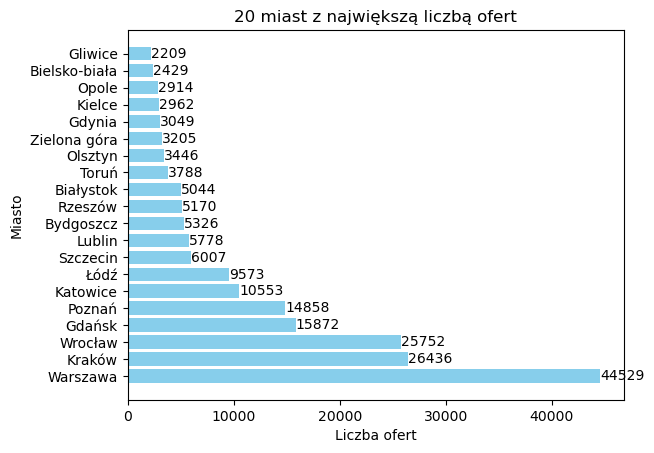

In [20]:
# Zliczenie wartości w kolumnie city
city_counts = df_clean['city'].value_counts().head(20)

# Narysowanie wykresu słupkowego poziomego
plt.barh(city_counts.index, city_counts.values, color='skyblue')
plt.xlabel('Liczba ofert')
plt.ylabel('Miasto')
plt.title('20 miast z największą liczbą ofert')

# Dodanie liczb ofert na każdym słupku
for index, value in enumerate(city_counts.values):
    plt.text(value, index, str(value), va='center')  # va='center' zapewnia wyrównanie w pionie

plt.show()

<span style='color: violet'> Komentarz:
<li style='color: violet'>Najwięcej, czyli ok 19% ofert, pochodzi z firm warszawskich. Dużo miejsc pracy można znaleźć również w Krakowie i Wrocławiu.

### <span style='color: lightgreen'>5.2 Kraje

In [21]:
df['country_code'].value_counts()

PL    223566
DE      1021
GB       767
US       621
CZ       382
       ...  
TH         1
KY         1
QA         1
MU         1
UY         1
Name: country_code, Length: 89, dtype: int64

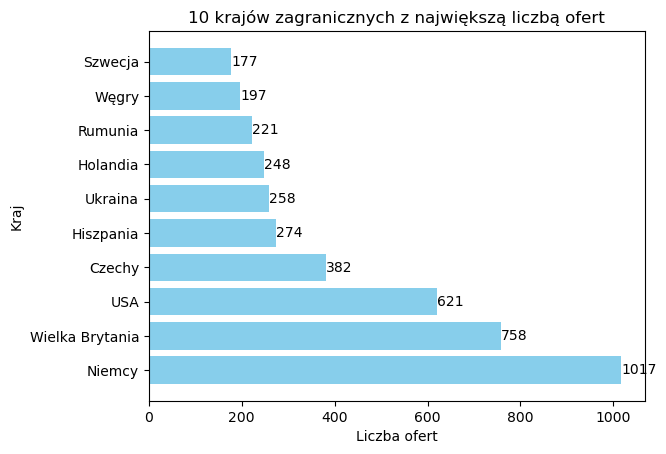

In [22]:
# Zliczenie wartości w kolumnie country_code
country_counts = df_clean['country_code'].value_counts().iloc[1:11]

# Zmiana nazw na osi Y (na przykład)
popular_countries = ['Niemcy', 'Wielka Brytania', 'USA', 'Czechy', 'Hiszpania', 
              'Ukraina', 'Holandia', 'Rumunia', 'Węgry', 'Szwecja']

# Narysowanie wykresu słupkowego poziomego
plt.barh(country_counts.index, country_counts.values, color='skyblue')
plt.xlabel('Liczba ofert')
plt.ylabel('Kraj')
plt.title('10 krajów zagranicznych z największą liczbą ofert')

# Dodanie liczb ofert na każdym słupku
for index, value in enumerate(country_counts.values):
    plt.text(value, index, str(value), va='center')  # va='center' zapewnia wyrównanie w pionie

# Ustawianie nowych etykiet na osi Y
plt.yticks(ticks=range(len(popular_countries)), labels=popular_countries)

plt.show()

<span style='color: violet'> Komentarze:
<li style='color: violet'>Aż ok. 97,5% wszystkich ofert pochodzi z polskich firm.
<li style='color: violet'>Oferty zagraniczne to najczęściej Niemcy, Wielka Brytania i USA.

### <span style='color: lightgreen'>5.3 Miejsce pracy

C:\Users\User\AppData\Local\Temp\ipykernel_15660\285598487.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(title='Typ miejsca pracy')


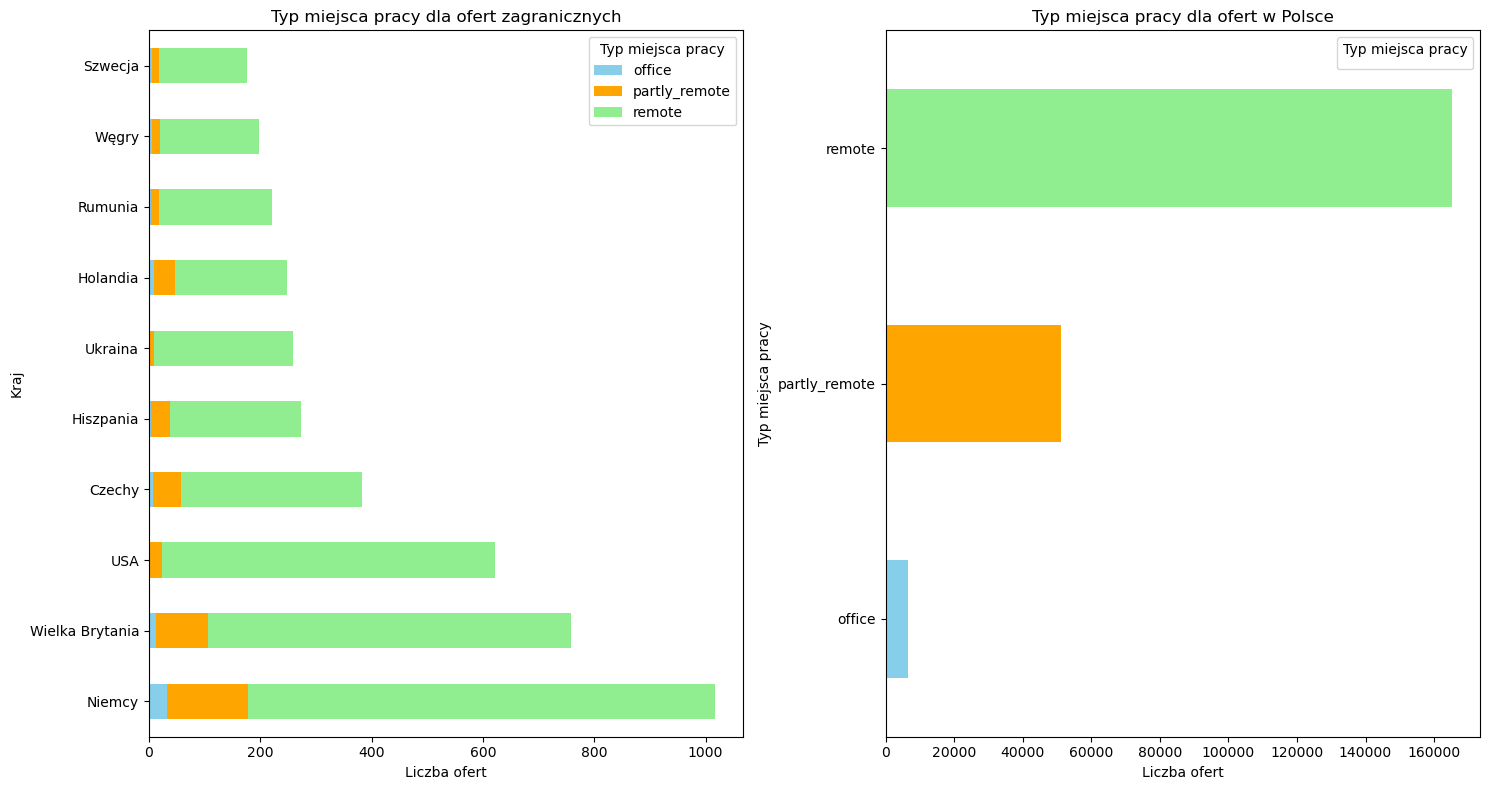

In [23]:
# Zliczanie wartości w kolumnie country_code i pomijanie Polski
country_counts = df_clean['country_code'].value_counts()
country_counts_without_poland = country_counts[country_counts.index != 'Polska']

# Wybieranie krajów z indeksem 1-10
top_countries = country_counts_without_poland.iloc[1:11].index

# Grupa po 'country_code' i 'workplace_type' oraz zliczanie
country_workplace_counts = df_clean.groupby(['country_code', 'workplace_type']).size().unstack(fill_value=0)

# Filtrowanie dla wybranych krajów
country_workplace_counts = country_workplace_counts.loc[top_countries]

# Zmiana etykiet krajów na pełne nazwy w tablicy 'popular_countries'
popular_countries = ['Niemcy', 'Wielka Brytania', 'USA', 'Czechy', 
                     'Hiszpania', 'Ukraina', 'Holandia', 'Rumunia', 
                     'Węgry', 'Szwecja']

# Tworzenie osobnych wykresów
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Wykres dla krajów z indeksem 1-10
country_workplace_counts.plot(kind='barh', stacked=True, color=['skyblue', 'orange', 'lightgreen'], ax=axes[0])
axes[0].set_yticklabels(popular_countries)
axes[0].set_xlabel('Liczba ofert')
axes[0].set_ylabel('Kraj')
axes[0].set_title('Typ miejsca pracy dla ofert zagranicznych')
axes[0].legend(title='Typ miejsca pracy')

# Wykres dla ofert z Polski
poland_workplace_counts = df_clean[df_clean['country_code'] == 'PL'].groupby('workplace_type').size()
poland_workplace_counts.plot(kind='barh', color=['skyblue', 'orange', 'lightgreen'], ax=axes[1])
axes[1].set_xlabel('Liczba ofert')
axes[1].set_ylabel('Typ miejsca pracy')
axes[1].set_title('Typ miejsca pracy dla ofert w Polsce')
axes[1].legend(title='Typ miejsca pracy')

plt.tight_layout()
plt.show()

<span style='color: violet'> Komentarze:
<li style='color: violet'>Niezależnie od kraju, ofert pracy zdalnej jest zdecydowanie najwięcej, a ofert pracy wyłącznie stacjonarnej najmniej.
<li style='color: violet'>W przypadku pracy hybrydowej lub stacjonarnej w krajach zagranicznych nie mamy niestety informacji odnośnie opcji zakwaterowania.

### <span style='color: lightgreen'>5.4 Nazwa firmy

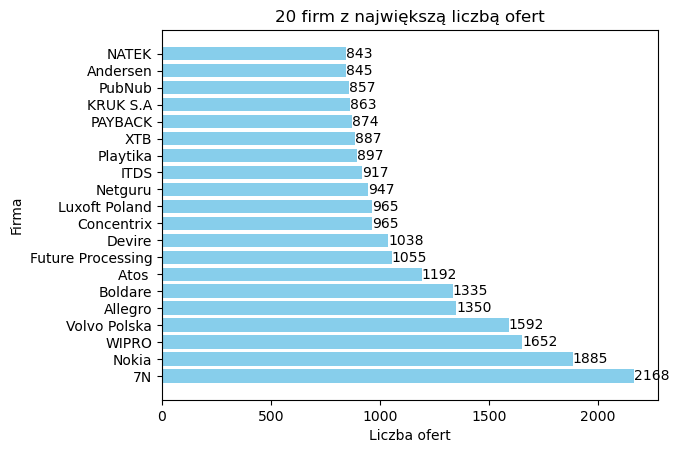

In [24]:
# Zliczenie wartości w kolumnie country_code
company_counts = df_clean['company_name'].value_counts().iloc[0:20]

# Narysowanie wykresu słupkowego poziomego
plt.barh(company_counts.index, company_counts.values, color='skyblue')
plt.xlabel('Liczba ofert')
plt.ylabel('Firma')
plt.title('20 firm z największą liczbą ofert')

# Dodanie liczb ofert na każdym słupku
for index, value in enumerate(company_counts.values):
    plt.text(value, index, str(value), va='center')  # va='center' zapewnia wyrównanie w pionie

plt.show()

<span style='color: violet'> Komentarz:
<li style='color: violet'>Firmy z największą liczbą ofert to 7N, Nokia i WIPRO.

### <span style='color: lightgreen'>5.5 Poziom doświadczenia

C:\Users\User\AppData\Local\Temp\ipykernel_15660\2962256193.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(title='Poziom doświadczenia')


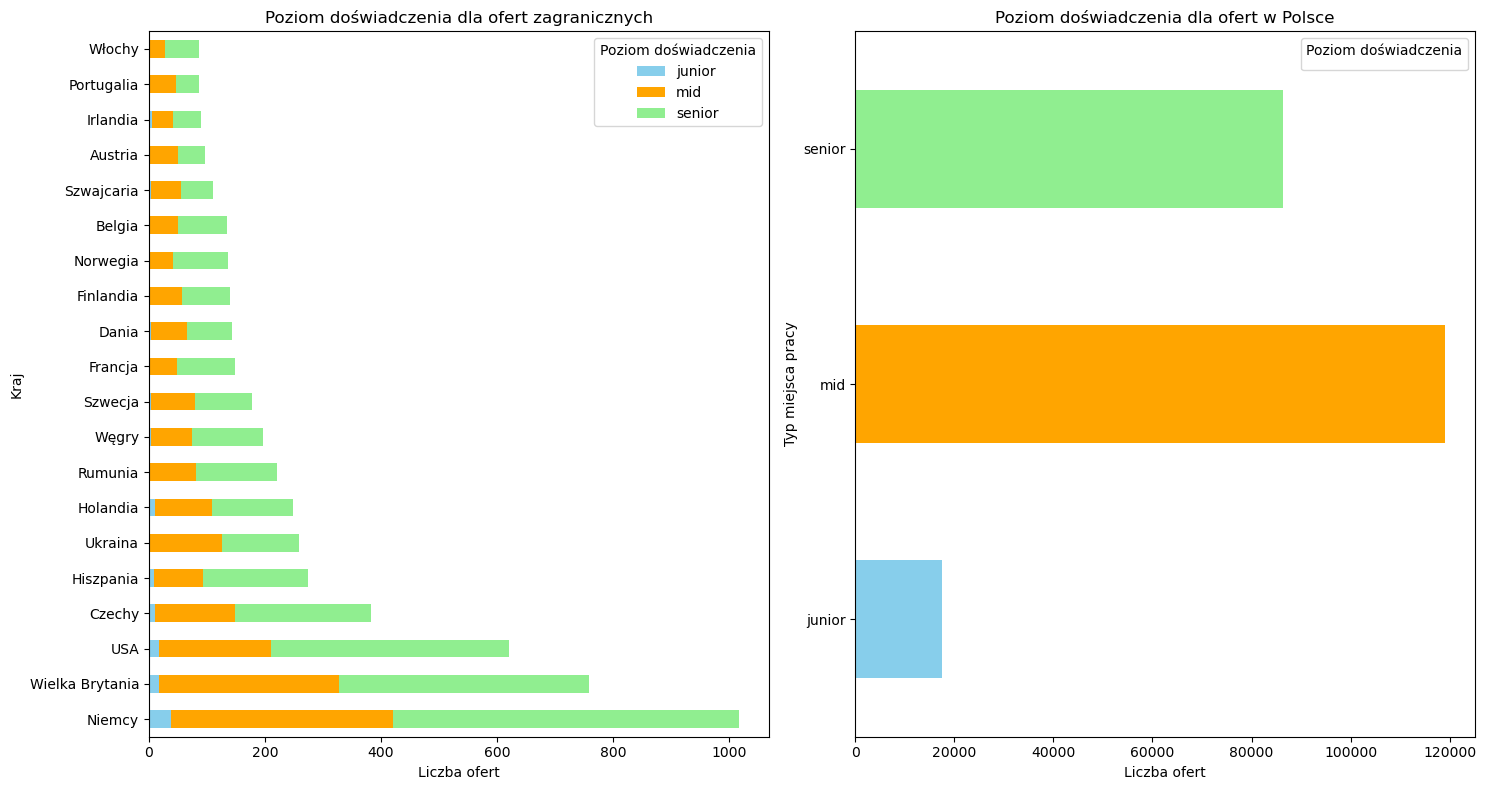

In [25]:
# Zliczanie wartości w kolumnie country_code i pomijanie Polski
country_counts = df_clean['country_code'].value_counts()
country_counts_without_poland = country_counts[country_counts.index != 'Polska']

# Wybieranie krajów z indeksem 1-10
top_countries = country_counts_without_poland.iloc[1:21].index

# Grupa po 'country_code' i 'workplace_type' oraz zliczanie
country_workplace_counts = df_clean.groupby(['country_code', 'experience_level']).size().unstack(fill_value=0)

# Filtrowanie dla wybranych krajów
country_workplace_counts = country_workplace_counts.loc[top_countries]

# Zmiana etykiet krajów na pełne nazwy w tablicy 'popular_countries'
popular_countries = ['Niemcy', 'Wielka Brytania', 'USA', 'Czechy', 
                     'Hiszpania', 'Ukraina', 'Holandia', 'Rumunia', 
                     'Węgry', 'Szwecja', 'Francja','Dania','Finlandia',
                     'Norwegia','Belgia','Szwajcaria','Austria','Irlandia',
                     'Portugalia','Włochy']

# Tworzenie osobnych wykresów
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Wykres dla krajów z indeksem 1-10
country_workplace_counts.plot(kind='barh', stacked=True, color=['skyblue', 'orange', 'lightgreen'], ax=axes[0])
axes[0].set_yticklabels(popular_countries)
axes[0].set_xlabel('Liczba ofert')
axes[0].set_ylabel('Kraj')
axes[0].set_title('Poziom doświadczenia dla ofert zagranicznych')
axes[0].legend(title='Poziom doświadczenia')

# Wykres dla ofert z Polski
poland_workplace_counts = df_clean[df_clean['country_code'] == 'PL'].groupby('experience_level').size()
poland_workplace_counts.plot(kind='barh', color=['skyblue', 'orange', 'lightgreen'], ax=axes[1])
axes[1].set_xlabel('Liczba ofert')
axes[1].set_ylabel('Typ miejsca pracy')
axes[1].set_title('Poziom doświadczenia dla ofert w Polsce')
axes[1].legend(title='Poziom doświadczenia')

plt.tight_layout()
plt.show()

<span style='color: violet'> Komentarze:
<li style='color: violet'>W Polsce, Austrii, Szwajcarii i we Włoszech najczęściej poszukiwani są specjaliści na poziomie doświadczenia mid.
<li style='color: violet'>W pozostałych 17 krajach z największą liczbą ofert najczęściej poszukiwani są seniorzy.

### <span style='color: lightgreen'>5.6 Typ umowy

C:\Users\User\AppData\Local\Temp\ipykernel_15660\2981612305.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(title='Typ zatrudnienia')


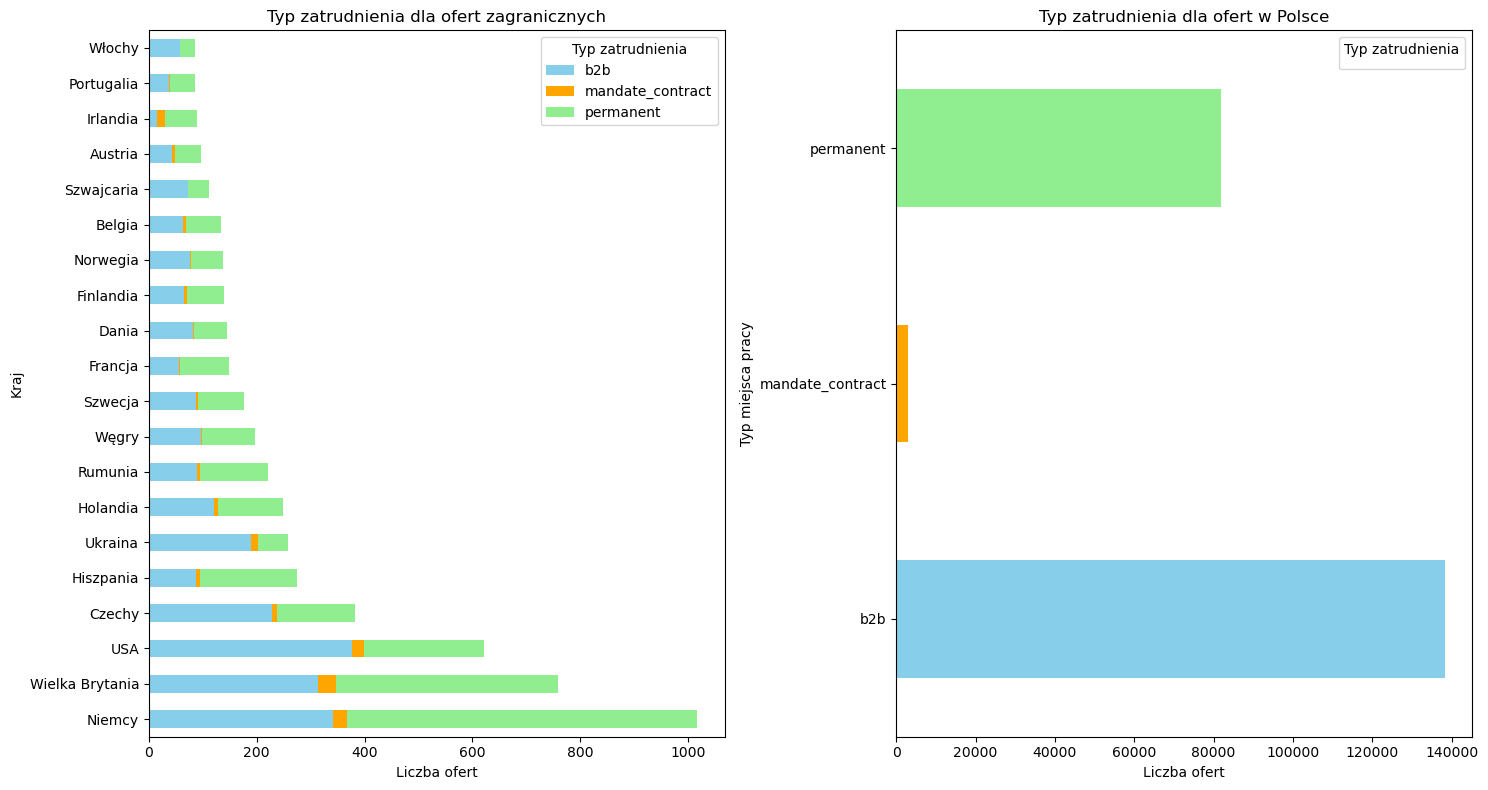

In [26]:
# Zliczanie wartości w kolumnie country_code i pomijanie Polski
country_counts = df_clean['country_code'].value_counts()
country_counts_without_poland = country_counts[country_counts.index != 'Polska']

# Wybieranie krajów z indeksem 1-10
top_countries = country_counts_without_poland.iloc[1:21].index

# Grupa po 'country_code' i 'workplace_type' oraz zliczanie
country_workplace_counts = df_clean.groupby(['country_code', 'type']).size().unstack(fill_value=0)

# Filtrowanie dla wybranych krajów
country_workplace_counts = country_workplace_counts.loc[top_countries]

# Zmiana etykiet krajów na pełne nazwy w tablicy 'popular_countries'
popular_countries = ['Niemcy', 'Wielka Brytania', 'USA', 'Czechy', 
                     'Hiszpania', 'Ukraina', 'Holandia', 'Rumunia', 
                     'Węgry', 'Szwecja', 'Francja','Dania','Finlandia',
                     'Norwegia','Belgia','Szwajcaria','Austria','Irlandia',
                     'Portugalia','Włochy']

# Tworzenie osobnych wykresów
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Wykres dla krajów z indeksem 1-10
country_workplace_counts.plot(kind='barh', stacked=True, color=['skyblue', 'orange', 'lightgreen'], ax=axes[0])
axes[0].set_yticklabels(popular_countries)
axes[0].set_xlabel('Liczba ofert')
axes[0].set_ylabel('Kraj')
axes[0].set_title('Typ zatrudnienia dla ofert zagranicznych')
axes[0].legend(title='Typ zatrudnienia')

# Wykres dla ofert z Polski
poland_workplace_counts = df_clean[df_clean['country_code'] == 'PL'].groupby('type').size()
poland_workplace_counts.plot(kind='barh', color=['skyblue', 'orange', 'lightgreen'], ax=axes[1])
axes[1].set_xlabel('Liczba ofert')
axes[1].set_ylabel('Typ miejsca pracy')
axes[1].set_title('Typ zatrudnienia dla ofert w Polsce')
axes[1].legend(title='Typ zatrudnienia')

plt.tight_layout()
plt.show()

<span style='color: violet'> Komentarze:
<li style='color: violet'>W Polsce najwięcej ofert dotyczy zatrudnienia typu b2b - ok. 61,5%.
<li style='color: violet'>W Niemczech, Hiszpanii czy Francji znaczna większość ofert dotyczy zatrudnienia na umowę o pracę.

### <span style='color: lightgreen'>5.7 Wymagane umiejętności

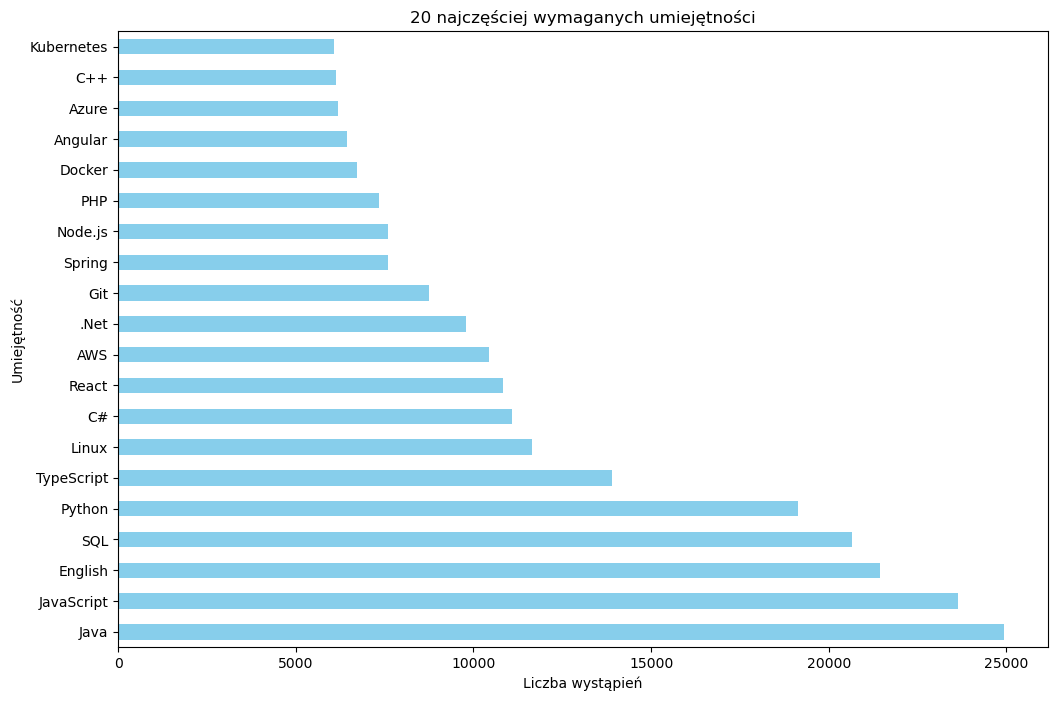

In [27]:
# Krok 1: Rozdzielenie umiejętności oddzielonych przecinkami
skills_series = df_clean['skills'].str.split(',').explode()  # Rozdzielenie i spłaszczenie
skills_series = skills_series.str.strip()  # Usunięcie białych znaków

# Krok 2: Zliczenie wystąpień umiejętności
skills_count = skills_series.value_counts()

# Krok 3: Wybór 20 najczęściej występujących umiejętności
top_skills = skills_count.nlargest(20)

# Krok 4: Narysowanie wykresu słupkowego
plt.figure(figsize=(12, 8))
top_skills.plot(kind='barh', color='skyblue')
plt.xlabel('Liczba wystąpień')
plt.ylabel('Umiejętność')
plt.title('20 najczęściej wymaganych umiejętności')
plt.show()

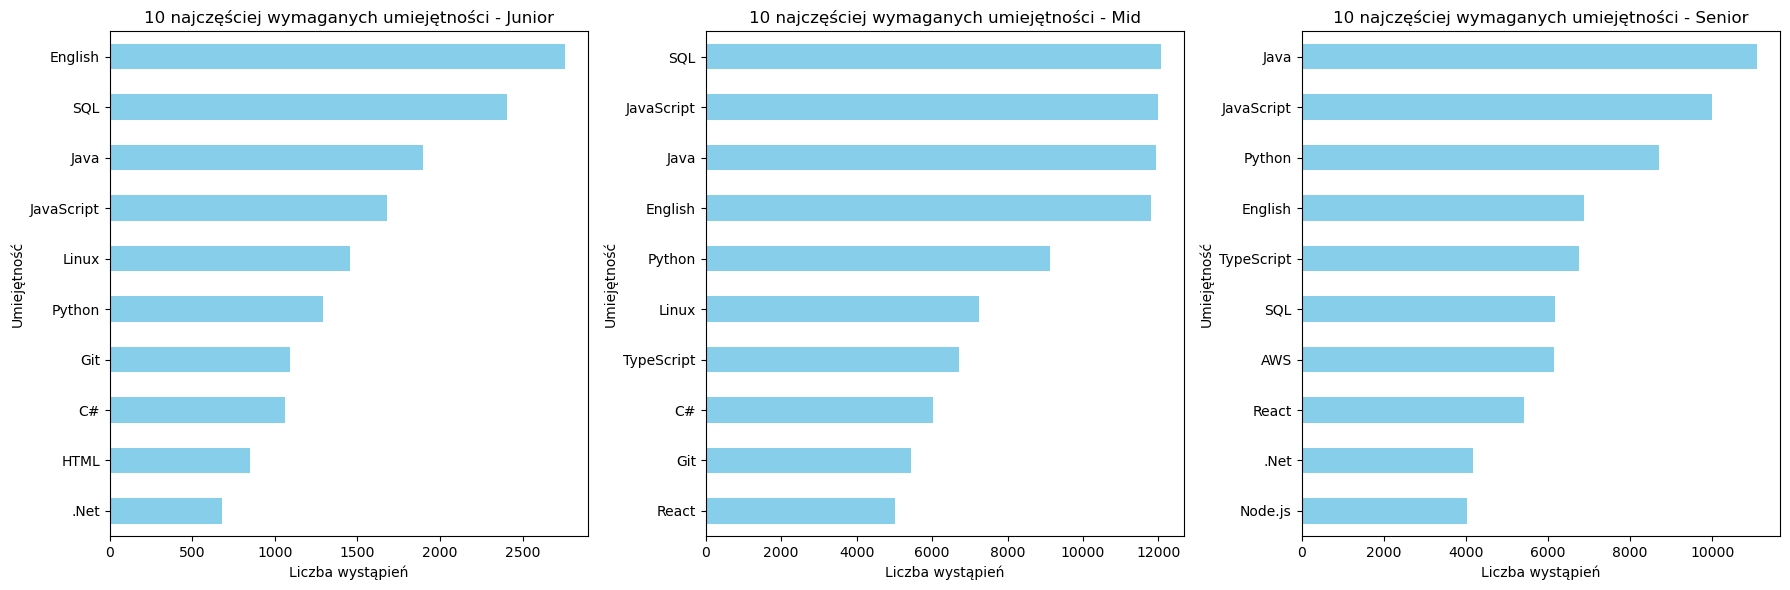

In [28]:
# Lista poziomów doświadczenia
experience_levels = ['junior', 'mid', 'senior']

# Przygotowanie figury i osi dla subplotów
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for ax, level in zip(axes, experience_levels):
    # Filtrowanie danych dla danego poziomu doświadczenia
    df_filtered = df_clean[df_clean['experience_level'] == level]

    # Krok 1: Rozdzielenie umiejętności
    skills_series = df_filtered['skills'].str.split(',').explode()
    skills_series = skills_series.str.strip()

    # Krok 2: Zliczenie wystąpień umiejętności
    skills_count = skills_series.value_counts()

    # Krok 3: Wybór 20 najczęściej występujących umiejętności
    top_skills = skills_count.nlargest(10)

    # Krok 4: Narysowanie wykresu słupkowego
    top_skills.plot(kind='barh', ax=ax, color='skyblue')
    ax.set_xlabel('Liczba wystąpień')
    ax.set_ylabel('Umiejętność')
    ax.set_title(f'10 najczęściej wymaganych umiejętności - {level.capitalize()}')
    ax.invert_yaxis()  # Odwrócenie osi Y dla lepszej przejrzystości

plt.tight_layout()  # Ułożenie wykresów
plt.show()

<span style='color: violet'> Komentarze:
<li style='color: violet'>Ogólnie najczęściej wymagane umiejętności obejmują języki programowania Java, JavaScript oraz znajomość języka angielskiego.
<li style='color: violet'>Od juniorów pracodawcy oczekują umiejętności głównie z zakresu j. angielskiego, SQL i Java, midowie powinni znać przede wszystkim SQL, JavaScript i Java, a seniorzy Java, JavaScript i Pythona.

### <span style='color: lightgreen'>5.7 Imigranci z Ukrainy

C:\Users\User\AppData\Local\Temp\ipykernel_15660\760156179.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(title='Zatrudniamy Ukraińców')


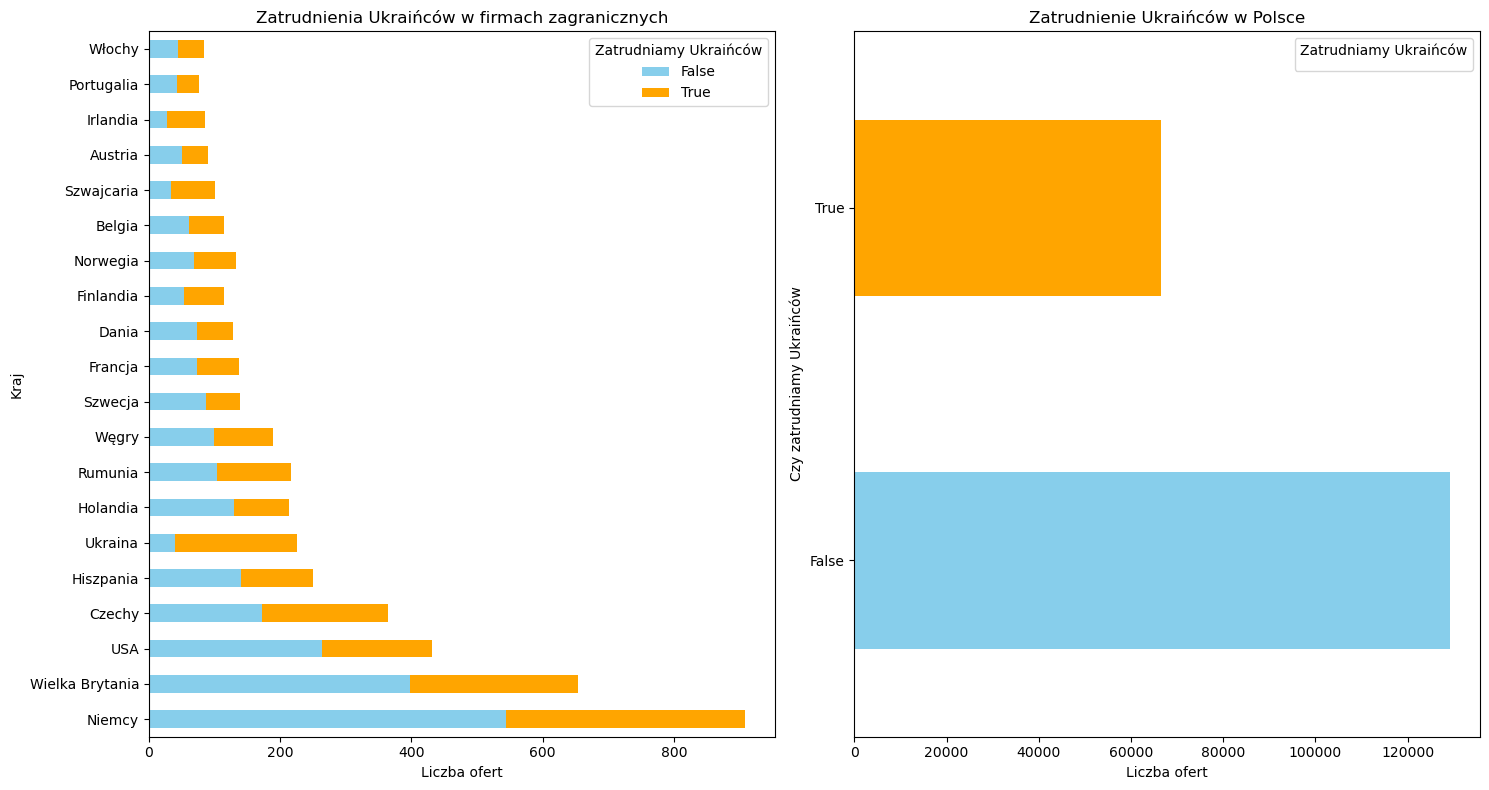

In [29]:
# Zliczanie wartości w kolumnie country_code i pomijanie Polski
country_counts = df_clean['country_code'].value_counts()
country_counts_without_poland = country_counts[country_counts.index != 'Polska']

# Wybieranie krajów z indeksem 1-10
top_countries = country_counts_without_poland.iloc[1:21].index

# Grupa po 'country_code' i 'workplace_type' oraz zliczanie
country_workplace_counts = df_clean.groupby(['country_code', 'open_to_hire_ukrainians']).size().unstack(fill_value=0)

# Filtrowanie dla wybranych krajów
country_workplace_counts = country_workplace_counts.loc[top_countries]

# Zmiana etykiet krajów na pełne nazwy w tablicy 'popular_countries'
popular_countries = ['Niemcy', 'Wielka Brytania', 'USA', 'Czechy', 
                     'Hiszpania', 'Ukraina', 'Holandia', 'Rumunia', 
                     'Węgry', 'Szwecja', 'Francja','Dania','Finlandia',
                     'Norwegia','Belgia','Szwajcaria','Austria','Irlandia',
                     'Portugalia','Włochy']

# Tworzenie osobnych wykresów
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Wykres dla krajów z indeksem 1-10
country_workplace_counts.plot(kind='barh', stacked=True, color=['skyblue', 'orange', 'lightgreen'], ax=axes[0])
axes[0].set_yticklabels(popular_countries)
axes[0].set_xlabel('Liczba ofert')
axes[0].set_ylabel('Kraj')
axes[0].set_title('Zatrudnienia Ukraińców w firmach zagranicznych')
axes[0].legend(title='Zatrudniamy Ukraińców')

# Wykres dla ofert z Polski
poland_workplace_counts = df_clean[df_clean['country_code'] == 'PL'].groupby('open_to_hire_ukrainians').size()
poland_workplace_counts.plot(kind='barh', color=['skyblue', 'orange', 'lightgreen'], ax=axes[1])
axes[1].set_xlabel('Liczba ofert')
axes[1].set_ylabel('Czy zatrudniamy Ukraińców')
axes[1].set_title('Zatrudnienie Ukraińców w Polsce')
axes[1].legend(title='Zatrudniamy Ukraińców')

plt.tight_layout()
plt.show()

<span style='color: violet'> Komentarze:
<li style='color: violet'>Większość firm, zarówno w Polsce, jak i na świecie, nie jest otwarta na zatrudnianie Ukraińców.
<li style='color: violet'>W Europie wyjątek stanowią Szwajcaria i Finlandia.

### <span style='color: lightgreen'>5.7 Wynagrodzenie

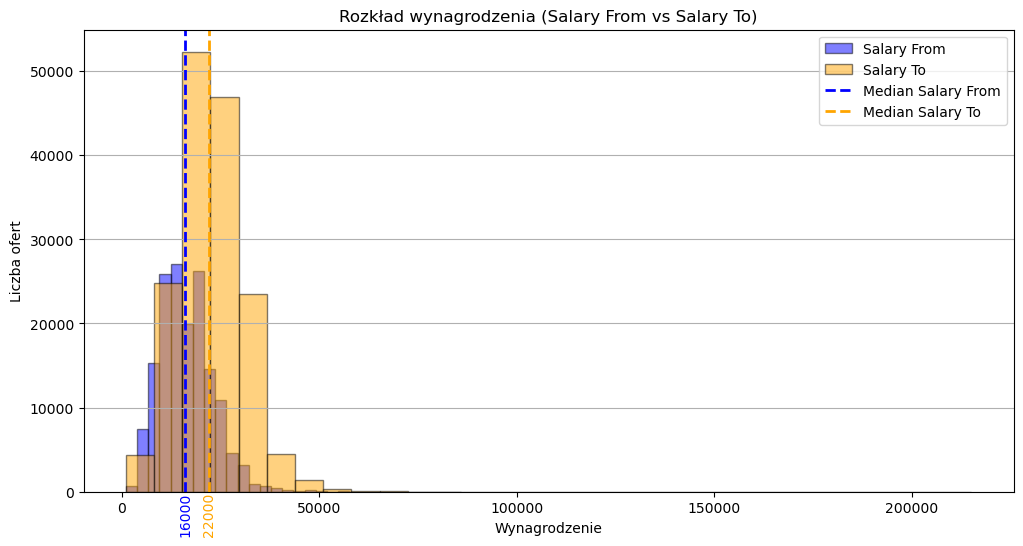

In [30]:
# Ustalanie granic wynagrodzenia
plt.figure(figsize=(12, 6))

# Histogram dla 'salary_from'
plt.hist(df_clean['salary_from'], bins=30, alpha=0.5, label='Salary From', color='blue', edgecolor='black')

# Histogram dla 'salary_to'
plt.hist(df_clean['salary_to'], bins=30, alpha=0.5, label='Salary To', color='orange', edgecolor='black')

# Obliczanie median
median_from = df_clean['salary_from'].median()
median_to = df_clean['salary_to'].median()

# Zaznaczanie median na wykresie
plt.axvline(median_from, color='blue', linestyle='dashed', linewidth=2, label='Median Salary From')
plt.axvline(median_to, color='orange', linestyle='dashed', linewidth=2, label='Median Salary To')

# Dodawanie napisów pionowo
plt.text(median_from, 5, round(median_from), color='blue', rotation=90, ha='center', va='top')
plt.text(median_to, 5, round(median_to), color='orange', rotation=90, ha='center', va='top')

plt.xlabel('Wynagrodzenie')
plt.ylabel('Liczba ofert')
plt.title('Rozkład wynagrodzenia (Salary From vs Salary To)')
plt.legend()
plt.grid(axis='y')
plt.show()

<span style='color: violet'> Komentarz:
<li style='color: violet'>Mediana miesięcznych widełek płacowych wynosi 16000-22000 zł.

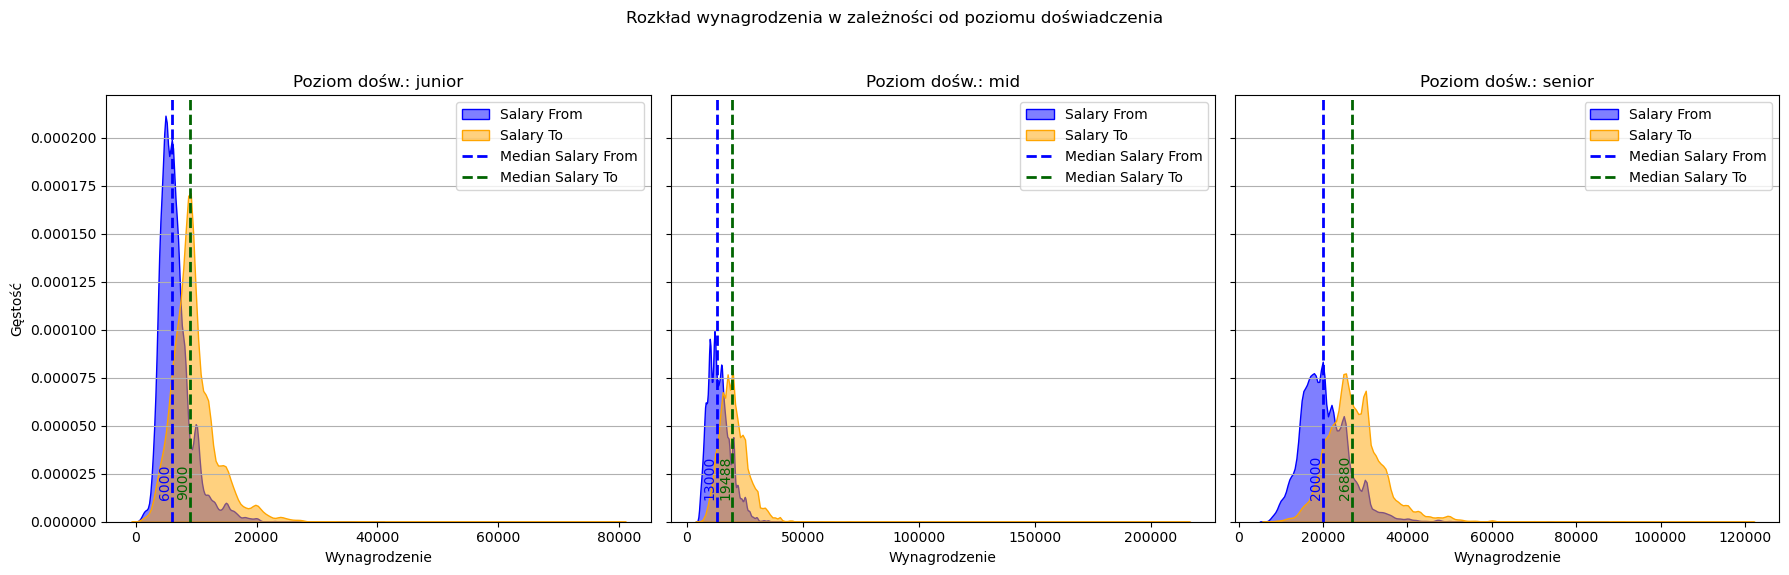

In [31]:
# Ustalanie poziomów doświadczenia i sortowanie
experience_levels = ['junior', 'mid', 'senior']

# Tworzenie subplots
fig, axes = plt.subplots(1, len(experience_levels), figsize=(18, 6), sharey=True)

# Iterowanie przez poziomy doświadczenia i rysowanie krzywych KDE
for ax, level in zip(axes, experience_levels):
    # Filtracja danych dla konkretnego poziomu doświadczenia
    level_data = df_clean[df_clean['experience_level'] == level]

    # Rysowanie krzywej KDE dla 'salary_from'
    sns.kdeplot(level_data['salary_from'], ax=ax, label='Salary From', color='blue', fill=True, alpha=0.5)

    # Rysowanie krzywej KDE dla 'salary_to'
    sns.kdeplot(level_data['salary_to'], ax=ax, label='Salary To', color='orange', fill=True, alpha=0.5)

    # Obliczanie median
    median_from = level_data['salary_from'].median()
    median_to = level_data['salary_to'].median()

    # Zaznaczanie median na wykresie
    ax.axvline(median_from, color='blue', linestyle='dashed', linewidth=2, label='Median Salary From')
    ax.axvline(median_to, color='darkgreen', linestyle='dashed', linewidth=2, label='Median Salary To')

    # Obliczenie maksymalnej gęstości dla każdej osi Y
    max_density = ax.get_ylim()[1]  # Pobieranie maksymalnej wartości osi Y

    # Dodawanie napisów pionowo w oparciu o maksymalną gęstość
    ax.text(median_from, max_density * 0.05, round(median_from), color='blue', rotation=90, ha='right', va='bottom')
    ax.text(median_to, max_density * 0.05, round(median_to), color='darkgreen', rotation=90, ha='right', va='bottom')

    # Ustawienia osi
    ax.set_xlabel('Wynagrodzenie')
    ax.set_title(f'Poziom dośw.: {level}')
    ax.legend()
    ax.grid(axis='y')

# Ustawienia wspólnej osi Y
axes[0].set_ylabel('Gęstość')
plt.suptitle('Rozkład wynagrodzenia w zależności od poziomu doświadczenia')

# Wyświetlanie wykresów
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Dostosowanie układu, aby tytuł nie nachodził na wykresy
plt.show()

<span style='color: violet'> Komentarz:
<li style='color: violet'>Mediana miesięcznych widełek płacowych dla juniora wynosi 6000-9000 zł, dla mida 13000-19488, a dla seniora 20000-26880 zł.

C:\Users\User\AppData\Local\Temp\ipykernel_15660\1303706878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['published_at_first'] = pd.to_datetime(df_clean['published_at_first'], errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_15660\1303706878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['published_at_last'] = pd.to_datetime(df_clean['published_at_last'], errors='coerce')


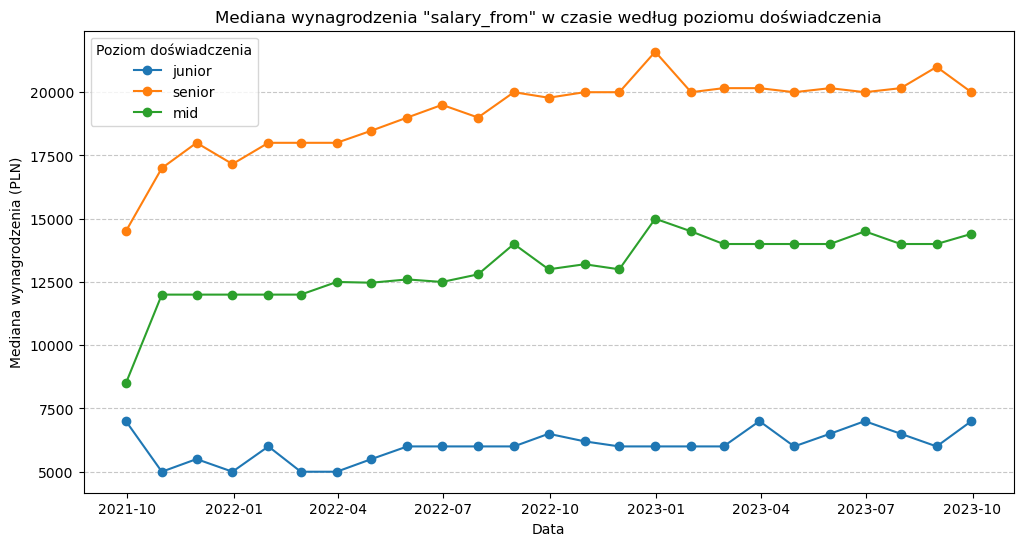

In [45]:
# zmiana formatu daty
df_clean['published_at_first'] = pd.to_datetime(df_clean['published_at_first'], errors='coerce')
df_clean['published_at_last'] = pd.to_datetime(df_clean['published_at_last'], errors='coerce')

# tworzymy przestrzeń dla wykresu
plt.figure(figsize=(12, 6))

# Obliczamy medianę wynagrodzenia salary_from co miesiąc dla każdego poziomu doświadczenia
for level in experience_levels:
    df_level = df_clean[df_clean['experience_level'] == level].set_index('published_at_first')
    median_salary_1M = df_level['salary_from'].resample('M').median()  # Użyj 'M' dla końca miesiąca
    plt.plot(median_salary_1M.index, median_salary_1M.values, label=level, marker='o', linestyle='-')

plt.xlabel('Data')
plt.ylabel('Mediana wynagrodzenia (PLN)')
plt.title('Mediana wynagrodzenia "salary_from" w czasie według poziomu doświadczenia')
plt.legend(title='Poziom doświadczenia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<span style='color: violet'> Komentarz:
<li style='color: violet'>Zdecydowanie najmniejsze zmiany wartości (jest najbardziej płaski) zauważamy dla zarobków juniora, co może wynikać z faktu, że zmiany wynagrodzenia są przeważnie procentowe.
<li style='color: violet'>Dla mida i seniora mediany zarobkowe zachowują podobne trendy.


C:\Users\User\AppData\Local\Temp\ipykernel_15660\3219135876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['published_at_first'] = pd.to_datetime(df_clean['published_at_first'], format='mixed')
C:\Users\User\AppData\Local\Temp\ipykernel_15660\3219135876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['published_at_last'] = pd.to_datetime(df_clean['published_at_last'], format='mixed')


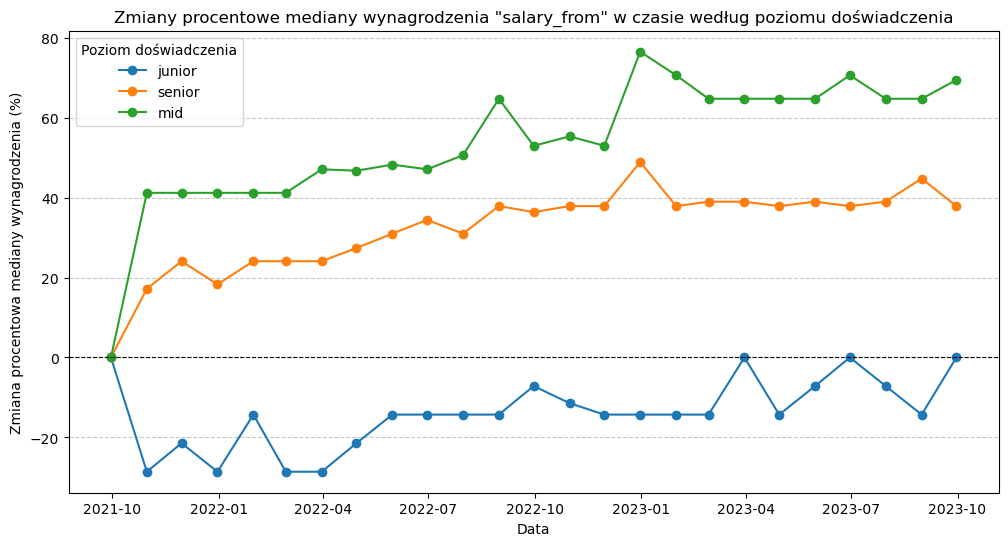

In [46]:
# zmiana formatu daty
df_clean['published_at_first'] = pd.to_datetime(df_clean['published_at_first'], format='mixed')
df_clean['published_at_last'] = pd.to_datetime(df_clean['published_at_last'], format='mixed')

# Tworzymy przestrzeń dla wykresu
plt.figure(figsize=(12, 6))

# Ustalamy bazową wartość (na październik 2021) dla obliczeń
base_date = '2021-10-01'

# Obliczamy zmiany procentowe mediany wynagrodzenia salary_from co miesiąc dla każdego poziomu doświadczenia
for level in experience_levels:
    df_level = df_clean[df_clean['experience_level'] == level].set_index('published_at_first')

    # Obliczamy medianę i resampling co miesiąc
    median_salary_1M = df_level['salary_from'].resample('1M').median()

    # Ustalamy wartość bazową
    if base_date in median_salary_1M.index:
        base_value = median_salary_1M[base_date]
    else:
        base_value = median_salary_1M.iloc[0]  # Jeśli nie ma dokładnej daty, bierzemy pierwszą medianę

    # Obliczanie procentowej zmiany w odniesieniu do wartości bazowej
    percentage_change = (median_salary_1M - base_value) / base_value * 100

    # Rysowanie zmian procentowych
    plt.plot(percentage_change.index, percentage_change.values, label=level, marker='o', linestyle='-')

plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Linia na poziomie 0
plt.xlabel('Data')
plt.ylabel('Zmiana procentowa mediany wynagrodzenia (%)')
plt.title('Zmiany procentowe mediany wynagrodzenia "salary_from" w czasie według poziomu doświadczenia')
plt.legend(title='Poziom doświadczenia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<span style='color: violet'> Komentarz:
<li style='color: violet'>Zmiany procentowe są najbardziej zauważalne dla juniora i mida.

### <span style='color: lightgreen'>5.8 Zmiany w czasie

C:\Users\User\AppData\Local\Temp\ipykernel_15660\1711003134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['published_at_first'] = pd.to_datetime(df_clean['published_at_first'], errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_15660\1711003134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['published_at_last'] = pd.to_datetime(df_clean['published_at_last'], errors='coerce')


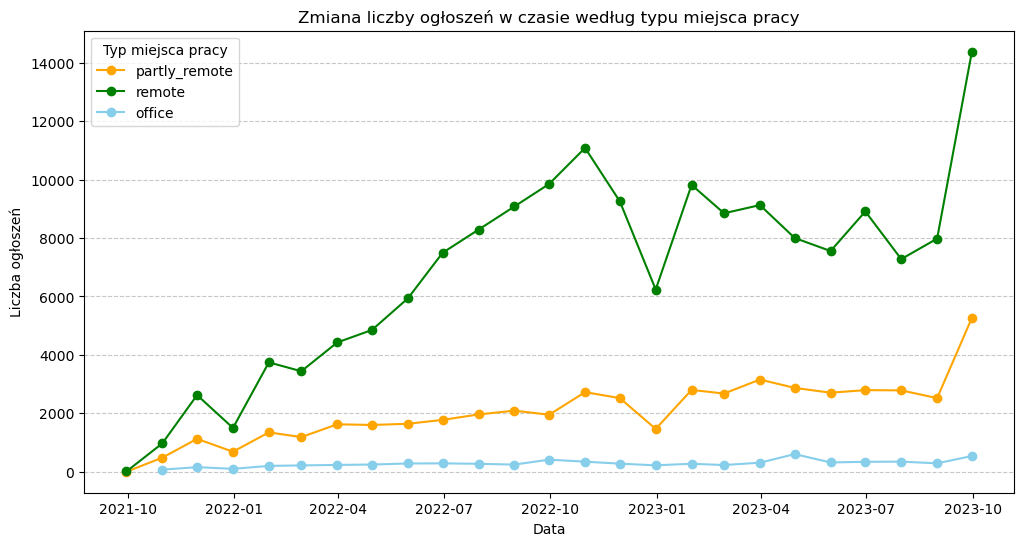

In [50]:
# zmiana formatu daty
df_clean['published_at_first'] = pd.to_datetime(df_clean['published_at_first'], errors='coerce')
df_clean['published_at_last'] = pd.to_datetime(df_clean['published_at_last'], errors='coerce')

workplace_types = df_clean['workplace_type'].unique()

# Przygotowanie danych do wykresu
plt.figure(figsize=(12, 6))

# Kolory dla różnych typów miejsc pracy
colors = {'office': 'skyblue', 'remote': 'green', 'partly_remote': 'orange'}

# Dla każdego typu miejsca pracy, obliczenie liczby ogłoszeń miesięcznie i narysowanie wykresu
for workplace in workplace_types:
    df_workplace = df_clean[df_clean['workplace_type'] == workplace].set_index('published_at_last')
    monthly_job_counts = df_workplace.resample('M').size()  # Użyj 'M' zamiast '1ME'
    plt.plot(monthly_job_counts.index, monthly_job_counts.values, label=workplace, color=colors.get(workplace, 'blue'), marker='o', linestyle='-')

plt.xlabel('Data')
plt.ylabel('Liczba ogłoszeń')
plt.title('Zmiana liczby ogłoszeń w czasie według typu miejsca pracy')
plt.legend(title='Typ miejsca pracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<span style='color: violet'> Komentarz:
<li style='color: violet'>Zdecydowanie w najszybszym tempie rosła liczba ofert w trybie pracy zdalnej.
<li style='color: violet'>Wykres dotyczący ofert pracy stacjonarnej jest niemal płaski - cały czas utrzymuje się na podobnym niskim poziomie.

C:\Users\User\AppData\Local\Temp\ipykernel_15660\1609770289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['published_at_first'] = pd.to_datetime(df_clean['published_at_first'], errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_15660\1609770289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['published_at_last'] = pd.to_datetime(df_clean['published_at_last'], errors='coerce')


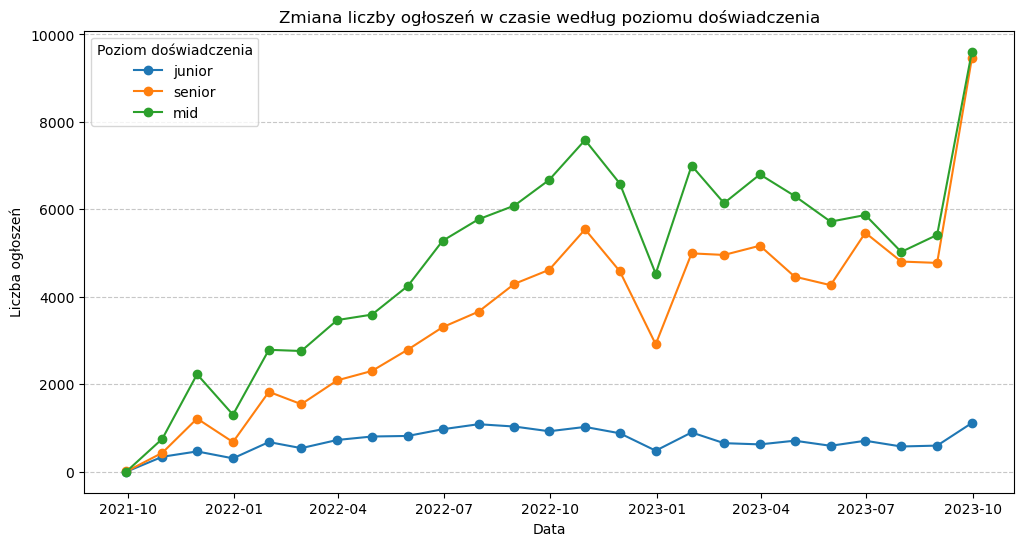

In [51]:
# zmiana formatu daty
df_clean['published_at_first'] = pd.to_datetime(df_clean['published_at_first'], errors='coerce')
df_clean['published_at_last'] = pd.to_datetime(df_clean['published_at_last'], errors='coerce')

experience_levels = df_clean['experience_level'].unique()

# Przygotowanie danych do wykresu
plt.figure(figsize=(12, 6))

# Dla każdego poziomu doświadczenia obliczamy liczbę ogłoszeń miesięcznie i rysujemy wykres
for level in experience_levels:
    df_experience_level = df_clean[df_clean['experience_level'] == level].set_index('published_at_last')
    monthly_job_counts = df_experience_level.resample('M').size()  # Używamy 'M' dla miesiąca 
    plt.plot(monthly_job_counts.index, monthly_job_counts.values, label=level, marker='o', linestyle='-')

plt.xlabel('Data')
plt.ylabel('Liczba ogłoszeń')
plt.title('Zmiana liczby ogłoszeń w czasie według poziomu doświadczenia')
plt.legend(title='Poziom doświadczenia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<span style='color: violet'> Komentarz:
<li style='color: violet'>Zmiany liczby ofert pracy zachowują podobne trendy niezależnie od poziomu doświadczenia.

## <span style='color: lightgreen'>6. Wartości odstające

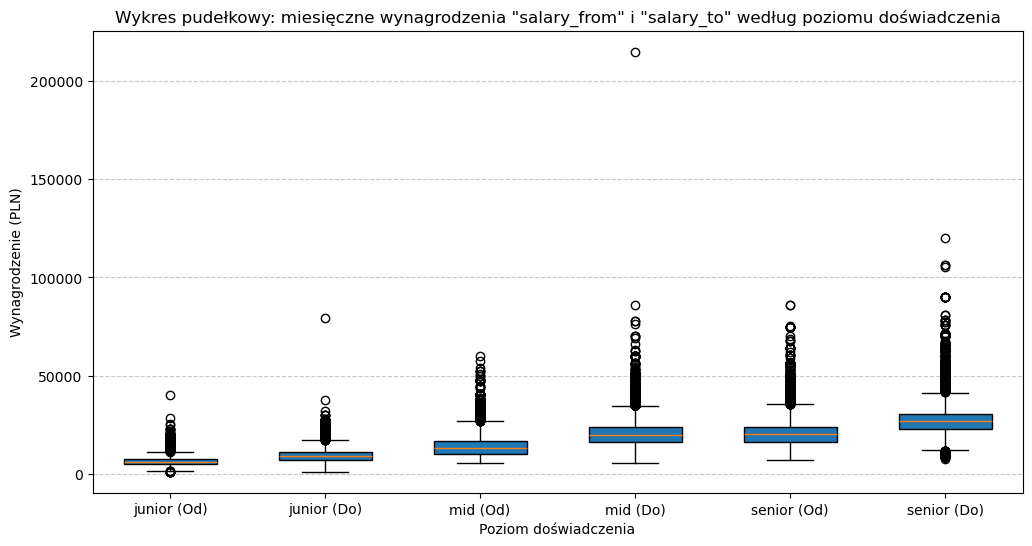

In [52]:
# Upewnijmy się, że dane są poprawne i nie zawierają NaN
salary_data = df_clean[
    (df_clean['salary_from'].notna()) & 
    (df_clean['salary_to'].notna()) & 
    (df_clean['salary_from'] > 0) & 
    (df_clean['salary_to'] > 0)
]

# Tworzenie wykresu
plt.figure(figsize=(12, 6))

# Ustalanie unikalnych poziomów doświadczenia
experience_levels = ['junior', 'mid', 'senior']

# Przygotowanie danych do wykresu
data_to_plot = []
labels = []

for level in experience_levels:
    from_data = salary_data[salary_data['experience_level'] == level]['salary_from']
    to_data = salary_data[salary_data['experience_level'] == level]['salary_to']

    # Append both 'salary_from' and 'salary_to' data for each level
    data_to_plot.append(from_data)
    data_to_plot.append(to_data)

    # Append corresponding labels
    labels.append(f'{level} (Od)')
    labels.append(f'{level} (Do)')

# Ustalanie pozycji wykresu
positions = [i for i in range(len(data_to_plot))]

# Rysowanie wykresu pudełkowego
plt.boxplot(data_to_plot, positions=positions, widths=0.6, patch_artist=True)

# Ustalanie etykiet osi X
plt.xticks(positions, labels)

# Estetyka wykresu
plt.title('Wykres pudełkowy: miesięczne wynagrodzenia "salary_from" i "salary_to" według poziomu doświadczenia')
plt.xlabel('Poziom doświadczenia')
plt.ylabel('Wynagrodzenie (PLN)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Wyświetlenie wykresu
plt.show()

<span style='color: violet'> Komentarze:
<li style='color: violet'>W widełkach wynagrodzenia występuje bardzo dużo wartości odstających, niezależnie od poziomu doświadczenia.
<li style='color: violet'>Najbardziej przyciąga wzrok outlier dla górnej granicy płacy poziomu mid - niemal na pewno jest to błąd ogłoszeniodawcy, ponieważ kwota dolnej granicy widełek jest aż 10-krotnie mniejsza.
<li style='color: violet'>Wartości mniejsze od założonego minimum dla juniorów to staże i praktyki, a wartości większe od maksimum dla seniorów to głównie stanowiska kierownicze.
<li style='color: violet'>Należy pamiętać, że założone mediany, minima i maksima mogą być obarczone błędem, ponieważ część wypłat została przekształcona do miesięcznej z dniowej, tygodniowej czy rocznej według ustalonych granic, które również mogą zawierać błędy.

## <span style='color: lightgreen'>6. Wnioski i komentarze

<span style='color: violet'> Powyższa analiza obejmowała dane dotyczące ofert pracy ze strony JustJoinIT z okresu 2 lat, czyli od września 2021 r. do września 2023 r.
Jak prezentują się oferty sprzed kilku lat na tle tych aktualnych? Na to pytanie postaram się odpowiedzieć porównując ogłoszenia w odniesieniu do dwóch kryteriów: sposobu prezentacji ofert oraz wartości w nich zawartych.

<li style='color: violet; font-size: 20px; margin-bottom: 12px;'>Prezentacja danych <br></li>
<span style='color: violet;'>Zdecydowanie największy problem danych sprzed lat to brak wymiaru czasu, którego dotyczy wynagrodzenie. Zmusza to do przyjęcia pewnych limitów płac dziennych, tygodniowych, miesięcznych i rocznych, co może prowadzić do błędów. W ofertach aktualnych problem ten jest rozwiązany poprzez dodatkową kolumnę z podanym wymiarem czasowym. Druga niedogodność dotyczy ofert firm zagranicznych, które ofertują pracę hybrydową, nie podając przy tym informacji o możliwości zakwaterowania oraz o wymiarze czasu pracy. W obecnych ofertach firmy informują, czy szukają pracownika na pełny etat lub część oraz podają kilka lokalizacji, więc łatwiej potencjalnemu kandydatowi wybrać tę najbardziej dogodną.</span>

<li style='color: violet; font-size: 20px; margin-bottom: 12px;'>Praca dziś a kiedyś <br></li>
<span style='color: violet;'>Jak kilka lat temu, tak i teraz, najczęściej poszukiwani są seniorzy, dominujący typ zatrudnienia to b2b, a listę miast z największą liczbą ofert otwierają: Warszawa, Kraków, Wrocław, Gdańsk i Poznań. W latach 2021-2023 dominował typ pracy zdalnej, a obecnie najczęściej występuje hybryda. W zarobkach wzrost można zauważyć głównie dla juniorów. W przypadku najczęściej wymaganych umiejętności języki programowania Java i JavaScript ustąpiły miejsca Pythonowi i Sql, a znajomość języka angielskiego jest niezmiennie jednym z priorytetów dla pracodawców.</span>

In [53]:
!jupyter nbconvert eda_old_data_justjoinit.ipynb --to html --no-input --no-prompt --output eda_old_data_justjoinit.html

[NbConvertApp] Converting notebook eda_old_data_justjoinit.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 16 image(s).
[NbConvertApp] Writing 1536302 bytes to eda_old_data_justjoinit.html
